# Part A.1

## Lane–Emden Equation: Step-by-Step Breakdown
The Lane–Emden equation is given as:

$
\frac{1}{\xi^2} \frac{d}{d\xi} \left( \xi^2 \frac{d\theta}{d\xi} \right) + \theta^n = 0
$

## Assumption:
Expand $\theta(\xi)$ as:

$
\theta(\xi) = 1 + a_2 \xi^2 + a_4 \xi^4 + \dots
$

Substitute this into the Lane–Emden equation.

---

## Step-by-Step Expansion:

### First Derivative $\frac{d\theta}{d\xi}$:
$
\frac{d\theta}{d\xi} = 2a_2 \xi + 4a_4 \xi^3 + \dots
$

### Second Derivative $\frac{d^2\theta}{d\xi^2}$:
$
\frac{d^2\theta}{d\xi^2} = 2a_2 + 12a_4 \xi^2 + \dots
$

### Mass Continuity Term:
The term $\frac{1}{\xi^2} \frac{d}{d\xi} \left( \xi^2 \frac{d\theta}{d\xi} \right)$:

Start with:
$
\frac{d}{d\xi} \left( \xi^2 \frac{d\theta}{d\xi} \right) = \frac{d}{d\xi} \left( \xi^2 \left( 2a_2 \xi + 4a_4 \xi^3 \right) \right)
$

Expand:
$
\xi^2 \frac{d\theta}{d\xi} = 2a_2 \xi^3 + 4a_4 \xi^5 + \dots
$

Differentiate:
$
\frac{d}{d\xi} \left( \xi^2 \frac{d\theta}{d\xi} \right) = 6a_2 \xi^2 + 20a_4 \xi^4 + \dots
$

Divide by $\xi^2$:
$
\frac{1}{\xi^2} \frac{d}{d\xi} \left( \xi^2 \frac{d\theta}{d\xi} \right) = 6a_2 + 20a_4 \xi^2 + \dots
$

---

### Polytropic Term $\theta^n$:
Expand $(1 + a_2 \xi^2 + a_4 \xi^4)^n$ using the binomial theorem:
$
\theta^n = 1 + n a_2 \xi^2 + \left( n a_4 + \frac{n(n-1)}{2} a_2^2 \right) \xi^4 + \dots
$

---

### Substitution:
Substitute all terms into the Lane–Emden equation:
$
\frac{1}{\xi^2} \frac{d}{d\xi} \left( \xi^2 \frac{d\theta}{d\xi} \right) + \theta^n = 0
$

This becomes:
$
\left( 6a_2 + 20a_4 \xi^2 + \dots \right) + \left( 1 + n a_2 \xi^2 + \dots \right) = 0
$

---

## Matching Powers of $\xi$:

### Constant Term ($\xi^0$):
$
6a_2 + 1 = 0 \quad \Rightarrow \quad a_2 = -\frac{1}{6}
$

### Quadratic Term ($\xi^2$):
$
20a_4 + n a_2 = 0 \quad \Rightarrow \quad a_4 = -\frac{n a_2}{20}
$

Substitute $a_2 = -\frac{1}{6}$:
$
a_4 = -\frac{n \left( -\frac{1}{6} \right)}{20} = \frac{n}{120}
$

---

## Final Result:
$
a_2 = -\frac{1}{6}, \quad a_4 = \frac{n}{120}
$

---

## Below you can run the code to find the values computationally.

In [1]:
import sympy

# Define variables
xi = sympy.Symbol('xi', real=True)
n = sympy.Symbol('n', real=True, positive=True)

# Coefficients in the expansion
a2 = sympy.Symbol('a2', real=True)
a4 = sympy.Symbol('a4', real=True)

# Expansion of θ(ξ)
theta = 1 + a2 * xi**2 + a4 * xi**4

# First and second derivatives of θ(ξ)
dtheta = theta.diff(xi)
ddtheta = dtheta.diff(xi)

# Mass continuity term: (1/xi^2) * d/dxi(xi^2 * dθ/dxi)
mass_continuity = (1 / xi**2) * ((xi**2) * dtheta).diff(xi)

# Polytropic term: θ^n
polytropic_term = theta**n

# Lane-Emden equation
lane_emden_eq = mass_continuity + polytropic_term

# Expand the Lane-Emden equation about xi = 0
LE_series = sympy.series(lane_emden_eq, xi, 0, 6).expand()

# Collect coefficients of powers of xi
coeffs = sympy.collect(LE_series, xi, evaluate=False)

# Extract terms for matching powers of xi
constant_term = coeffs.get(1, 0)  # Coefficient of ξ^0
quadratic_term = coeffs.get(xi**2, 0)  # Coefficient of ξ^2

# Solve for a2 and a4
a2_solution = sympy.solve(constant_term, a2)[0]
a4_solution = sympy.solve(quadratic_term.subs(a2, a2_solution), a4)[0]

# Display results
print("Lane-Emden series about xi=0 up to xi^5:")
print(LE_series)
print("\nSolution for a2 and a4:")
print(f"a2 = {a2_solution}")
print(f"a4 = {a4_solution}")

Lane-Emden series about xi=0 up to xi^5:
1 + 20*a4*xi**2 + a4*n*xi**4 + 6*a2 + a2*n*xi**2 - a2**2*n*xi**4/2 + a2**2*n**2*xi**4/2 + O(xi**6)

Solution for a2 and a4:
a2 = -1/6 + O(xi**6)
a4 = n/120 + O(xi**6)


# Part A.2

## Below you can run the code to find the solution θ(ξ) = sin(ξ)/ξ computationally.

In [2]:
import sympy as sp

# Define symbolic variables and function
xi = sp.Symbol('xi', positive=True)
theta = sp.Function('theta')(xi)

# Lane-Emden equation for n=1
LE_eq = (1/xi**2) * sp.diff(xi**2 * sp.diff(theta, xi), xi) + theta

# Solve the Lane-Emden equation symbolically
solution = sp.dsolve(LE_eq, theta)

# Print the general solution
print("General solution to the Lane-Emden equation for n=1:")
sp.pprint(solution)

# Verify the boundary conditions
# The boundary conditions are:
#   theta(0) = 1, theta'(0) = 0
# Since solving symbolically can be challenging with these specific BCs,
# we will validate by substituting a known solution (sin(xi)/xi).

candidate_solution = sp.sin(xi) / xi
test_eq = LE_eq.subs(theta, candidate_solution)
test_eq_simplified = sp.simplify(test_eq)

# Provide a more descriptive output for the verification
print("\nVerification of the candidate solution θ(ξ) = sin(ξ)/ξ:")
print("Substituting θ(ξ) = sin(ξ)/ξ into the Lane-Emden equation gives:")
sp.pprint(test_eq)
if test_eq_simplified == 0:
    print("\nThe candidate solution θ(ξ) = sin(ξ)/ξ satisfies the Lane-Emden equation for n=1.")
else:
    print("\nThe candidate solution θ(ξ) = sin(ξ)/ξ does NOT satisfy the Lane-Emden equation.")


General solution to the Lane-Emden equation for n=1:
       C₁⋅besselj(1/2, ξ) + C₂⋅bessely(1/2, ξ)
θ(ξ) = ───────────────────────────────────────
                          √ξ                  

Verification of the candidate solution θ(ξ) = sin(ξ)/ξ:
Substituting θ(ξ) = sin(ξ)/ξ into the Lane-Emden equation gives:
              2                         
          2  d ⎛sin(ξ)⎞       d ⎛sin(ξ)⎞
         ξ ⋅───⎜──────⎟ + 2⋅ξ⋅──⎜──────⎟
              2⎝  ξ   ⎠       dξ⎝  ξ   ⎠
sin(ξ)      dξ                          
────── + ───────────────────────────────
  ξ                      2              
                        ξ               

The candidate solution θ(ξ) = sin(ξ)/ξ satisfies the Lane-Emden equation for n=1.


# Part B: White Dwarf Data Fitting

                           wdid   logg   mass
0       2MASS J10145164+4541479  7.455  0.301
1          2QZ J114947.9-012045  8.497  0.907
2                     GJ 1179 B  7.783  0.454
3  Gaia DR2 1007682723024253184  7.885  0.510
4  Gaia DR2 1010300965150157824  8.035  0.600


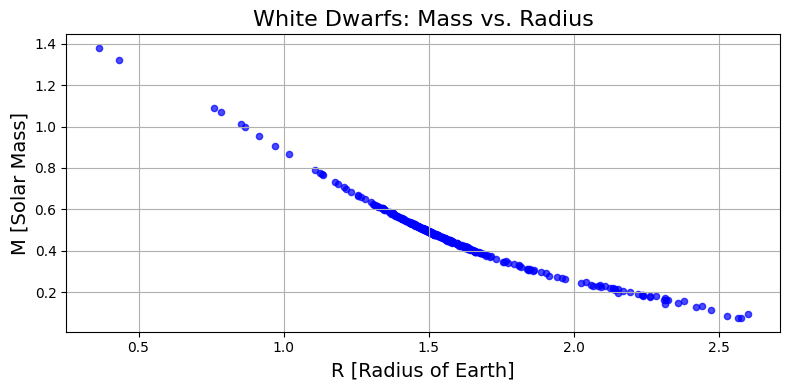

In [10]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Constants in CGS
G_CGS        = 6.6743e-8        # gravitational constant [cm^3 g^-1 s^-2]
MSUN_GRAMS   = 1.989e33         # solar mass in grams
REARTH_CM    = 6.371e8          # Earth radius in cm

# ------------------------------------------------------------
# 1) Read the CSV data with Pandas
# ------------------------------------------------------------
df = pd.read_csv('white_dwarf_data.csv', comment='#')  
# Make sure your CSV file has no problematic header lines or weird delimiters
# By default, pd.read_csv assumes comma-separated columns.

# Let's see the first few lines:
print(df.head())

# The columns in df should be: ['wdid','logg','mass']
# wdid: star name
# logg: log10 of surface gravity in cgs
# mass: WD mass in solar masses

# ------------------------------------------------------------
# 2) Convert mass & logg => radius in Earth radii
# ------------------------------------------------------------
# log(g) in cgs => g in cm/s^2
g_vals = 10**df['logg'].values

# mass in solar masses => mass in grams
m_vals = df['mass'].values * MSUN_GRAMS

# radius in cm => sqrt( G M / g )
r_cm   = np.sqrt(G_CGS * m_vals / g_vals)

# radius in Earth radii
r_earth = r_cm / REARTH_CM

# ------------------------------------------------------------
# 3) Make a scatter plot of M vs. R
#    (User asked for M in solar masses vs R in Earth radii.)
# ------------------------------------------------------------
fig, ax = plt.subplots(figsize=(8,4))

ax.scatter(r_earth, df['mass'], 
           marker='o', color='blue', alpha=0.7, s=20)

ax.set_xlabel(r'R [Radius of Earth]', fontsize=14)
ax.set_ylabel(r'M [Solar Mass]', fontsize=14)
ax.set_title('White Dwarfs: Mass vs. Radius', fontsize=16)

ax.grid(True)
plt.tight_layout()
plt.savefig('Newton_PartB_WhiteDwarfDataFitting.pdf', bbox_inches='tight')
plt.show()

# Part C.1: Symbolic expansion and finding the leading term

In [26]:
import sympy

# Define symbols
x = sympy.Symbol('x', real=True, positive=True)

# Step 1: Expand the first term inside the bracket
# x(2x^2 - 3)sqrt(1 + x^2)
sqrt_expansion = 1 + x**2 / 2 - x**4 / 8  # Expand sqrt(1 + x^2) for small x
x_term = x * (2 * x**2 - 3)  # x(2x^2 - 3)
first_term = x_term * sqrt_expansion  # Combine terms
first_term_expanded = sympy.expand(first_term)  # Expand into polynomial form

print("\n1. Expansion of x(2x^2 - 3)sqrt(1 + x^2):")
print(first_term_expanded)

# Step 2: Expand the second term 3 * sinh^-1(x)
# sinh^-1(x) ≈ x - x^3/6 + 3x^5/40
asinh_expansion = x - x**3 / 6 + 3 * x**5 / 40
second_term = 3 * asinh_expansion  # Multiply by 3
second_term_expanded = sympy.expand(second_term)

print("\n2. Expansion of 3 * sinh^-1(x):")
print(second_term_expanded)

# Step 3: Combine the expanded terms
combined_expansion = first_term_expanded + second_term_expanded
simplified_combined = sympy.simplify(combined_expansion)

print("\n3. Combined Expansion:")
print(simplified_combined)

# Step 4: Identify the leading term
# Extract terms proportional to x^5
leading_term = simplified_combined.as_leading_term(x)

print("\n4. Leading Term:")
print(leading_term)

# Verify result against theoretical expectation
expected_leading_term = (8 / 5) * x**5


1. Expansion of x(2x^2 - 3)sqrt(1 + x^2):
-x**7/4 + 11*x**5/8 + x**3/2 - 3*x

2. Expansion of 3 * sinh^-1(x):
9*x**5/40 - x**3/2 + 3*x

3. Combined Expansion:
x**5*(32 - 5*x**2)/20

4. Leading Term:
8*x**5/5
